In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import librosa #the mother of audio files
import librosa.display
import IPython.display as ipd
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE

In [4]:
data = pd.read_csv(r"C:\Users\nisar\Tie_proj\Data\features_3_sec.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
df = data.iloc[0:, 2:]
y = df.label.values
X = df.drop('label', axis = 1)
X_columns = X.columns
scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)
X = pd.DataFrame(scaled_data, columns = X_columns).values

#Splitting the data into training and testing 70% - 30% split

In [6]:
def model_build(model, kf, title = "Default"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    print("Accuracy score of", title, "is:", round(np.mean(accuracy_scores), 2))
    # Let's see the confusion matrix of the last split for a little insight
    con_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (16, 9))
    sns.heatmap(con_mat, cmap="Blues", annot=True, 
                xticklabels = ["blues", "classical", "country", "disco", 
                               "hiphop", "jazz", "metal", "pop", "reggae", "rock"], 
                yticklabels=["blues", "classical", "country", "disco", "hiphop", 
                             "jazz", "metal", "pop", "reggae", "rock"])
    plt.show()

In [7]:
split = KFold(n_splits=5, shuffle=True)

#1.Decision Tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy: 0.6761761761761762


Accuracy score of DecisionTreeClassifier is: 0.66


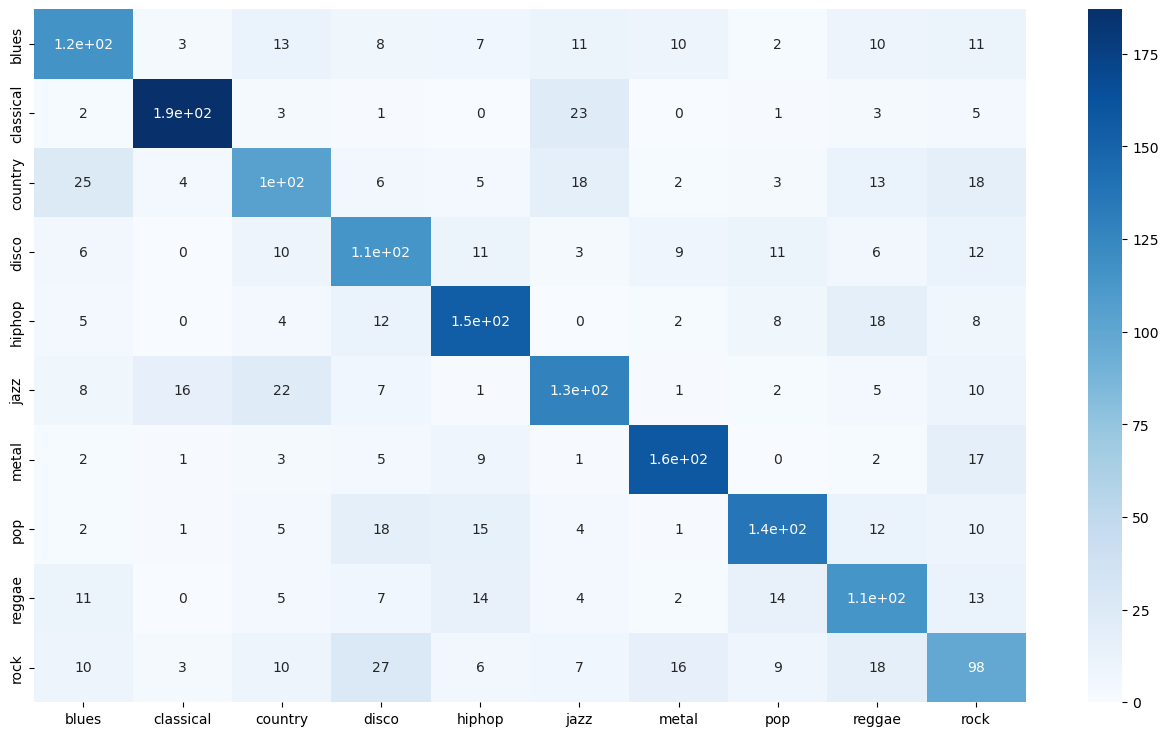

In [9]:
# confusion matrix
dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,)
model_build(dt_classifier, split, 'DecisionTreeClassifier')

#2.Naive Bayes Accuracy

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train a Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy}")


Naive Bayes Accuracy: 0.541041041041041


Accuracy score of GaussianNB is: 0.52


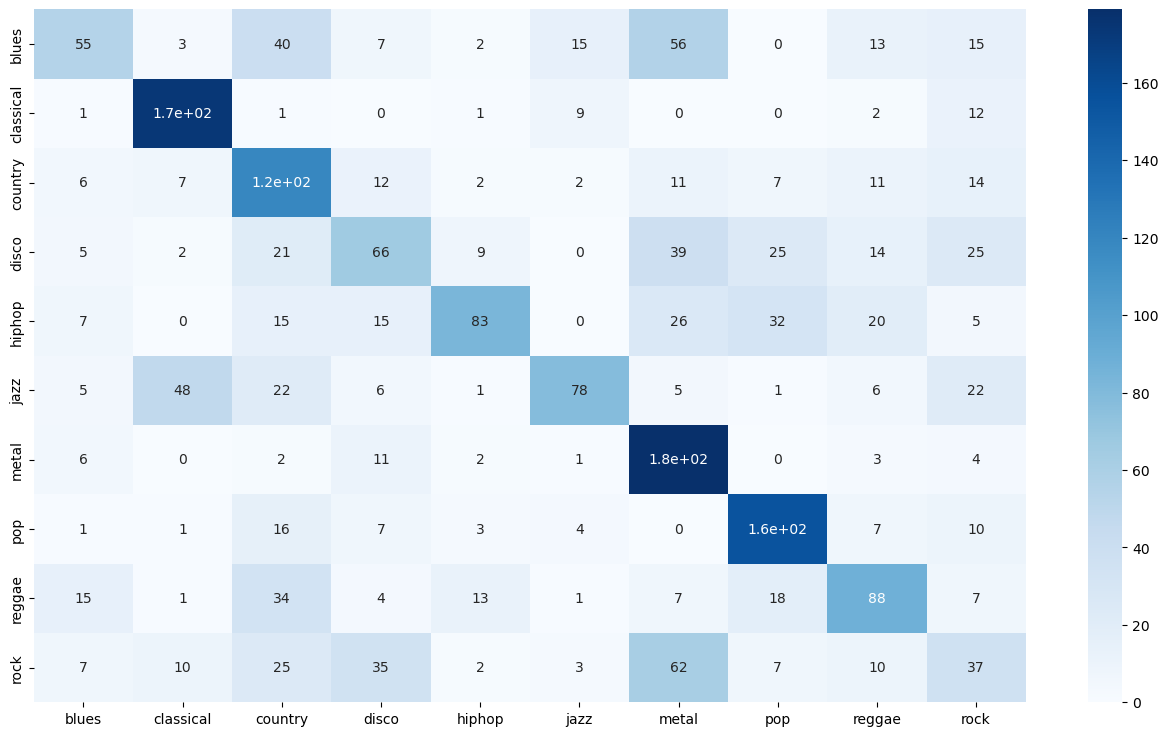

In [11]:
#confusion matrix
nb_classifier = GaussianNB(priors=None, var_smoothing=1e-09)
model_build(nb_classifier , split, 'GaussianNB')

#3.CNNs(Convolutional Neural Network)

In [12]:
!pip install tensorflow

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

height = 128
width = 128
channels = 3
num_classes=10
# Assuming input shape is spectrogram image
input_shape = (height, width, channels)

# Create CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)            

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features in X and target variable in y
# Replace placeholder values with your actual data
X = np.random.rand(100, 128, 128, 3)  # Example data (replace with your actual data)
y = np.random.randint(0, 2, size=(100,))  # Example labels (replace with your actual labels)

# Assuming number of classes in your classification problem
num_classes = 2

# Assuming your labels are integers and you need to convert them to one-hot encoding
y_one_hot = to_categorical(y, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1)

# Define the model
height, width, channels = 128, 128, 3  # Replace with your actual image dimensions
input_shape = (height, width, channels)

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = cnn_model.predict(X_test)

# Convert predictions back to class labels
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

# Evaluate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")


Epoch 1/10


2/2 [==============================] - 2s 477ms/step - loss: 7.2044 - accuracy: 0.5000 - val_loss: 0.6814 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 186ms/step - loss: 3.2334 - accuracy: 0.4062 - val_loss: 4.5914 - val_accuracy: 0.3750
Epoch 3/10
2/2 [==============================] - 0s 217ms/step - loss: 2.9656 - accuracy: 0.5000 - val_loss: 1.5566 - val_accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 184ms/step - loss: 0.9776 - accuracy: 0.5000 - val_loss: 0.6713 - val_accuracy: 0.6250
Epoch 5/10
2/2 [==============================] - 0s 202ms/step - loss: 0.7870 - accuracy: 0.5000 - val_loss: 0.6634 - val_accuracy: 0.6250
Epoch 6/10
2/2 [==============================] - 0s 204ms/step - loss: 0.7115 - accuracy: 0.5000 - val_loss: 0.7016 - val_accuracy: 0.3750
Epoch 7/10
2/2 [==============================] - 0s 200ms/step - loss: 0.6873 - accuracy: 0.5000 - val_loss: 0.7358 - val_accuracy: 0.3750
Epoch 8/10
2/2 [==

# 4.Support Vector Regression model ( with a mean squared error viewed in voice_classification)